In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import LeakyReLU
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [2]:
df=pd.read_csv("ANN_heart_Prediction.csv")

In [3]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


## First, we will anlyse our data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


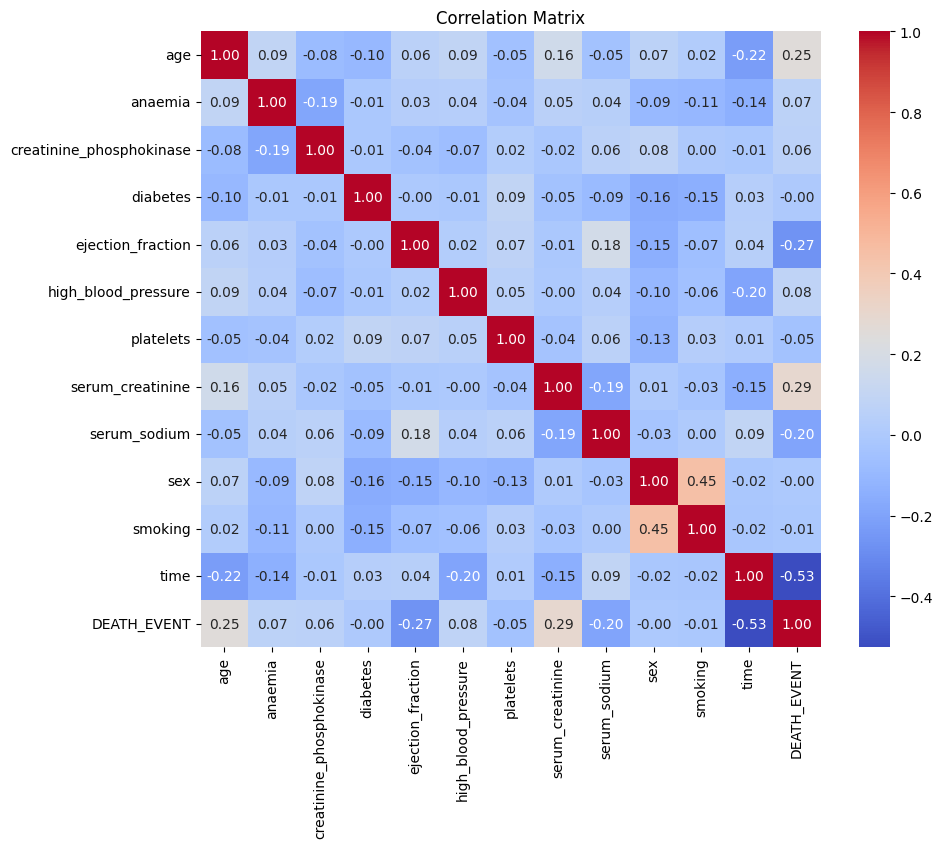

In [6]:
# Lets make a correlation matrix to see if there are any correlations between the attributes

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

From this we can notice that almost all factors have little to no linear correlation among each other. Only, the Follow-up period and Death Event have moderate negative correlaton; and smoking and sex of the patient have moderate positive correlation.

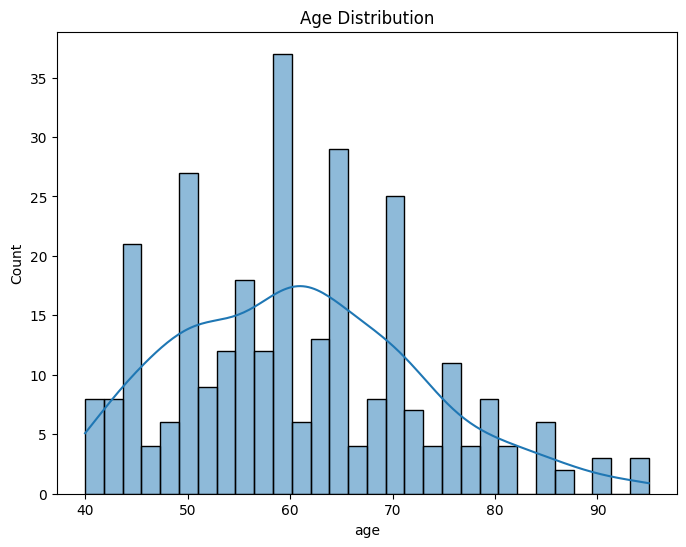

In [7]:
# Let us see the age distribution of the patients

plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

As we can see, all the patients were older than 40 and the highets number of them were ofaround 60-65 years.

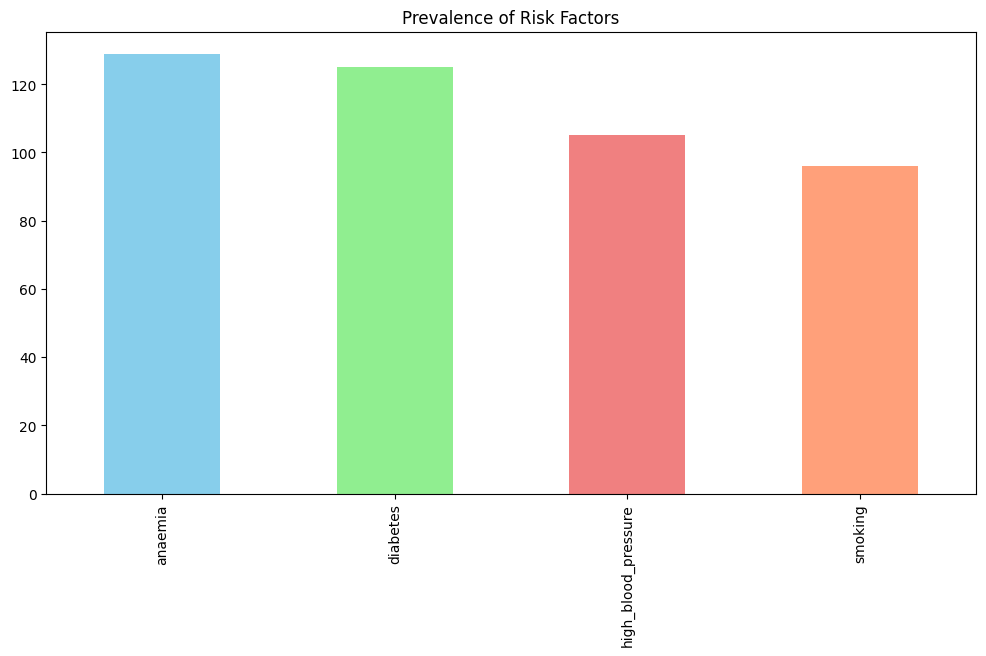

In [8]:
# Now we will determine the prevalence of risk factors such as diabetes, hypertension, and smoking

risk_factors = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']
plt.figure(figsize=(12, 6))
df[risk_factors].sum().plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Prevalence of Risk Factors')
plt.show()

Out of the 299 ptients, almost half of them have anaemia and/or diabetes. and one third of them have high BP and/or smoking habits.

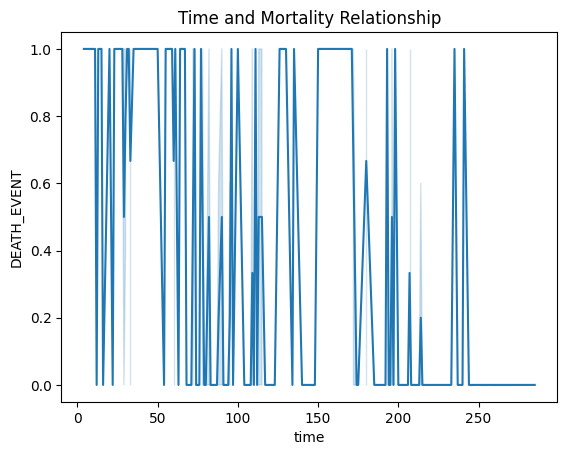

In [9]:
# Let us now investigate if there's a pattern in the follow-up time and mortality

sns.lineplot(x='time', y='DEATH_EVENT', data=df)
plt.title('Time and Mortality Relationship')
plt.show()

From this we can note that the majority of deaths were in the earlier phase of follow-up time. This means that if someone had survived the earlier time period, then they are more likely to survive overall.

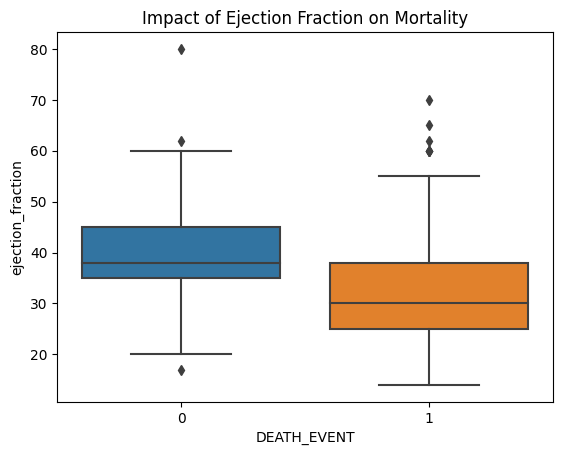

In [10]:
# Now we will plot the impact of Ejection Fraction on Mortality

sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)
plt.title('Impact of Ejection Fraction on Mortality')
plt.show()

## Now that we have analysed the data, it is time to preprocess it. 

Luckily, our data does not have any missing values or categorial values. Woohooo!!
So, only scaling and spliting into training and test set is required.

In [11]:
y = df.iloc[:, -1]
X = df.iloc[:, :-1]
X = X.copy()
y = y.copy()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [13]:
# Scaling the binary columns won't be necessary and it might cause a loss of information if not carefull 
# So I would scale only the continuous numeric columns and leave the binary ones

scaler = StandardScaler()
numeric_columns=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time'] 
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

## Now that we have split our data, let us make the SVM model

In [14]:
svm_model = SVC(kernel='rbf', C=0.8, random_state=40)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.7667

Confusion Matrix:
 [[17  1]
 [ 6  6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83        18
           1       0.86      0.50      0.63        12

    accuracy                           0.77        30
   macro avg       0.80      0.72      0.73        30
weighted avg       0.79      0.77      0.75        30



## Now making the Neural Network

In [16]:
model = Sequential()
model.add(Dense(units=16, activation=LeakyReLU(alpha=0.01), input_dim=12))
model.add(Dense(units=12, activation=LeakyReLU(alpha=0.01)))
model.add(Dropout(0.5))
model.add(Dense(units=8, activation=LeakyReLU(alpha=0.01)))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

In [17]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Epoch 1/50


9/9 [==============================] - 2s 37ms/step - loss: 0.7303 - accuracy: 0.4684 - val_loss: 0.6955 - val_accuracy: 0.4333
Epoch 2/50
9/9 [==============================] - 0s 7ms/step - loss: 0.7402 - accuracy: 0.4461 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 3/50
9/9 [==============================] - 0s 7ms/step - loss: 0.7171 - accuracy: 0.4721 - val_loss: 0.6890 - val_accuracy: 0.6000
Epoch 4/50
9/9 [==============================] - 0s 5ms/step - loss: 0.7199 - accuracy: 0.4647 - val_loss: 0.6874 - val_accuracy: 0.6333
Epoch 5/50
9/9 [==============================] - 0s 7ms/step - loss: 0.6962 - accuracy: 0.5279 - val_loss: 0.6858 - val_accuracy: 0.6667
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6970 - accuracy: 0.5465 - val_loss: 0.6843 - val_accuracy: 0.6333
Epoch 7/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6835 - accuracy: 0.5985 - val_loss: 0.6830 - val_accuracy: 0.6333
Epoch 8/50
9/9 [===============

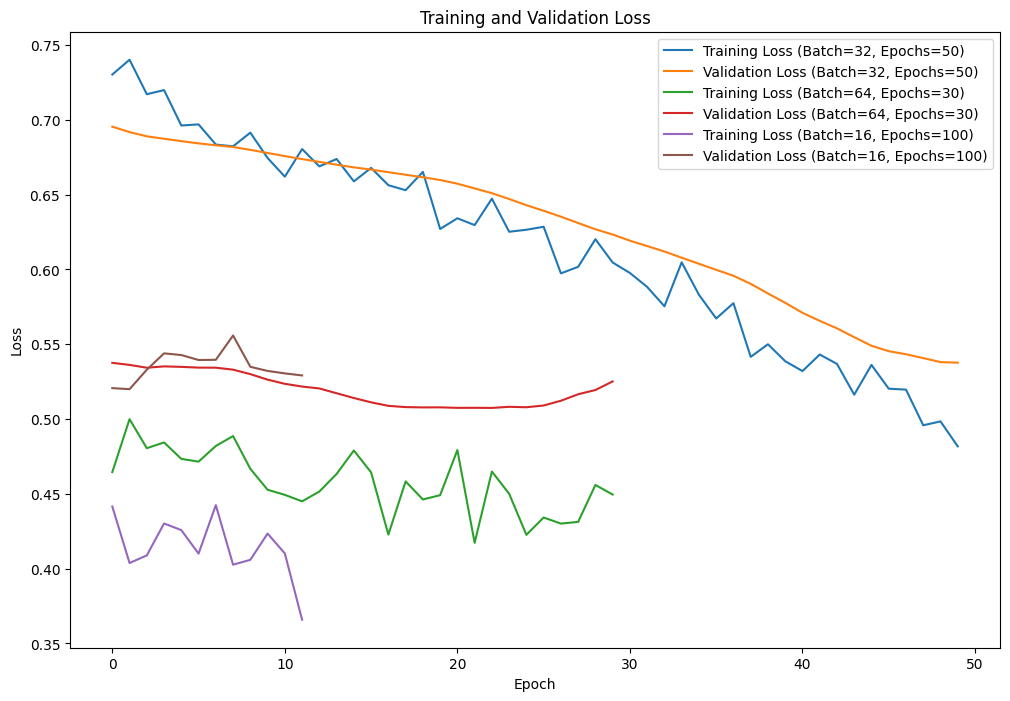

In [19]:
batch_epochs_combinations = [(32, 50), (64, 30), (16, 100)]

plt.figure(figsize=(12, 8))

for batch_size, epochs in batch_epochs_combinations:
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        verbose=1
    )
    
    # Plot training and validation loss with legends
    plt.plot(history.history['loss'], label=f'Training Loss (Batch={batch_size}, Epochs={epochs})')
    plt.plot(history.history['val_loss'], label=f'Validation Loss (Batch={batch_size}, Epochs={epochs})')
    
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)
    
    # Calculate and print metrics
    accuracy = accuracy_score(y_test, y_pred_binary)
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)
    
    print(f'\nBatch Size: {batch_size}, Epochs: {epochs}')
    print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}\n')

# Set plot labels and legend
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
evaluation_result = model.evaluate(X_test, y_test)
print(f"\nTest Set Evaluation - Loss: {evaluation_result[0]}, Accuracy: {evaluation_result[1]}")

1/1 [==============================] - 0s 28ms/step - loss: 0.5200 - accuracy: 0.7667

Test Set Evaluation - Loss: 0.5199671983718872, Accuracy: 0.7666666507720947
